In [ ]:
!pip install fbprophet
!pip install yfinance
!pip install sklearn


In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
from fbprophet import Prophet
from sklearn import linear_model ,svm
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
df = yf.download("BTC-USD",start ='2017-01-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


In [ ]:
df.head =df.reset_index()

In [ ]:
print(df.head)

      index       Date          Open  ...         Close     Adj Close       Volume
0         0 2017-01-01    963.658020  ...    998.325012    998.325012    147775008
1         1 2017-01-02    998.617004  ...   1021.750000   1021.750000    222184992
2         2 2017-01-03   1021.599976  ...   1043.839966   1043.839966    185168000
3         3 2017-01-04   1044.400024  ...   1154.729980   1154.729980    344945984
4         4 2017-01-05   1156.729980  ...   1013.380005   1013.380005    510199008
...     ...        ...           ...  ...           ...           ...          ...
1585   1585 2021-05-09  58877.390625  ...  58232.316406  58232.316406  65906690347
1586   1586 2021-05-10  58250.871094  ...  55859.796875  55859.796875  71776546298
1587   1587 2021-05-11  55847.242188  ...  56704.574219  56704.574219  61308396325
1588   1588 2021-05-12  56714.531250  ...  49150.535156  49150.535156  75215403907
1589   1589 2021-05-13  46980.019531  ...  50838.750000  50838.750000  96595214336

[15

In [ ]:
df[['ds','y']] =df[['Date','Adj Close']]

In [ ]:
print(df)

           Date          Open  ...         ds             y
0    2017-01-01    963.658020  ... 2017-01-01    998.325012
1    2017-01-02    998.617004  ... 2017-01-02   1021.750000
2    2017-01-03   1021.599976  ... 2017-01-03   1043.839966
3    2017-01-04   1044.400024  ... 2017-01-04   1154.729980
4    2017-01-05   1156.729980  ... 2017-01-05   1013.380005
...         ...           ...  ...        ...           ...
1585 2021-05-09  58877.390625  ... 2021-05-09  58232.316406
1586 2021-05-10  58250.871094  ... 2021-05-10  55859.796875
1587 2021-05-11  55847.242188  ... 2021-05-11  56704.574219
1588 2021-05-12  56714.531250  ... 2021-05-12  49150.535156
1589 2021-05-13  46980.019531  ... 2021-05-13  50838.750000

[1590 rows x 9 columns]


In [ ]:
model = Prophet()

In [ ]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(365)

In [ ]:
forecast = model.predict(future)

In [ ]:
print(forecast)

             ds          trend  ...  multiplicative_terms_upper           yhat
0    2017-01-01    1448.391344  ...                         0.0    -618.984295
1    2017-01-02    1399.192732  ...                         0.0    -430.188006
2    2017-01-03    1349.994120  ...                         0.0    -311.010174
3    2017-01-04    1300.795508  ...                         0.0    -194.514512
4    2017-01-05    1251.596896  ...                         0.0    -133.292499
...         ...            ...  ...                         ...            ...
1950 2022-05-09  116111.475983  ...                         0.0  121086.128077
1951 2022-05-10  116278.306524  ...                         0.0  121298.717162
1952 2022-05-11  116445.137065  ...                         0.0  121525.260895
1953 2022-05-12  116611.967606  ...                         0.0  121714.104900
1954 2022-05-13  116778.798147  ...                         0.0  122064.355890

[1955 rows x 19 columns]


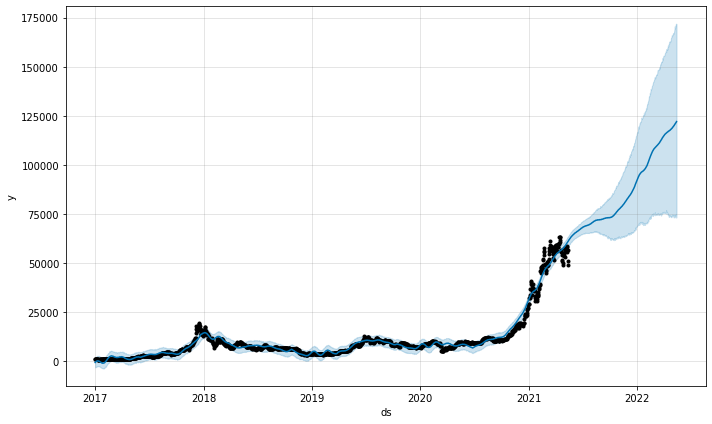

In [ ]:
model.plot(forecast)
plt.show()

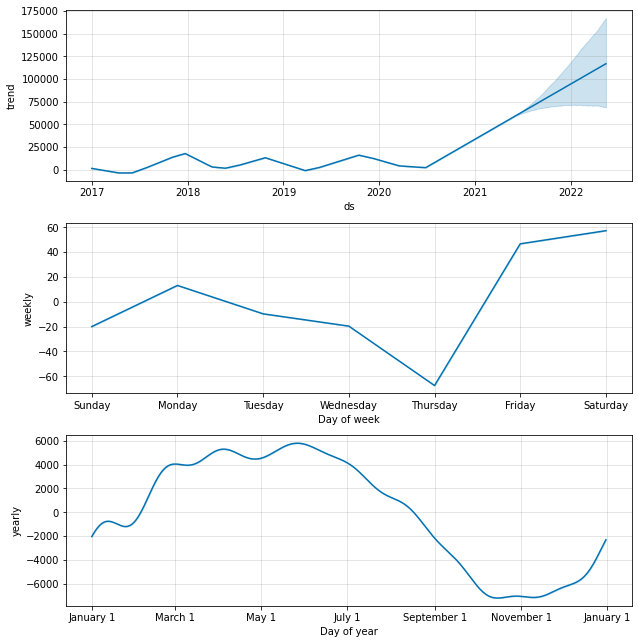

In [ ]:
model.plot_components(forecast)
plt.show()

In [ ]:
X = df[["Open","High","Low"]]
y = df["Close"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
Bit_1=linear_model.LinearRegression()
Bit_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = Bit_1.predict(X_test)
print(y_pred-y_test)

1355     -9.978143
652     223.847820
1052     40.561955
275       2.697396
599     -23.802846
           ...    
778     -32.504566
868    -112.383602
710      15.585987
100      -8.459323
542     -20.476359
Name: Close, Length: 525, dtype: float64
